##  计算信息熵 

In [5]:
import pandas as pd 
import numpy as np 

row_data = {'是否陪伴' :[0,0,0,1,1], '是否玩游戏':[1,1,0,1,1],
'渣男' :['是','是','不是','不是','不是']}

row_data

dataSet = pd.DataFrame(row_data)
dataSet

,是否玩游戏,是否陪伴,渣男
0,1,0,是
1,1,0,是
2,0,0,不是
3,1,1,不是
4,1,1,不是


In [19]:
print(dataSet.shape[0])# 数据集总行数 
print(dataSet.shape)

iset = dataSet.iloc[:,-1].value_counts()
iset

5
(5, 3)


不是    3
是     2
Name: 渣男, dtype: int64

In [17]:
def calEnt(dataSet):
    n = dataSet.shape[0] # 数据集总行数
    iset = dataSet.iloc[:,-1].value_counts() # 标签的所有类别 
    p = iset/n # 每一类标签所占比
    ent = (-p*np.log2(p)).sum() # 计算信息熵
    return ent

calEnt(dataSet)

0.9709505944546686

In [23]:
#  1.2 信息增益

dataSet.T  # 先转个置

,0,1,2,3,4
是否玩游戏,1,1,0,1,1
是否陪伴,0,0,0,1,1
渣男,是,是,不是,不是,不是


In [28]:
# 计算第1列的信息增益

a =(3/5)*(-(2/3) * np.log2(2/3)- (1/3)* np.log2(1/3)) # 计算信息熵
calEnt(dataSet) - a # 计算信息增益  

0.4199730940219749

In [31]:
# 计算第0列的信息增益
b =(4/5)*(-(2/4) * np.log2(2/4)- (2/4)* np.log2(2/4)) # 计算信息熵
calEnt(dataSet) - b # 计算信息增益  

0.17095059445466854

In [ ]:
# 谁差值大 也就是信息增益越大 越好 
# 

In [45]:
1.4 
# 定义信息熵
def calEnt(dataSet):
    n = dataSet.shape[0]
    iset = dataSet.iloc[:,-1].value_counts() 
    p = iset/n
    ent = (-p*np.log2(p)).sum()
    return ent

# 选择最优的列进行切分
def bestSplit(dataSet):
    baseEnt = calEnt(dataSet) 
    bestGain = 0
    axis = -1

    
    for i in range(dataSet.shape[1]-1):
        levels  = dataSet.iloc[:,i].value_counts().index
        ents = 0 

        for j in levels:
            childSet = dataSet[dataSet.iloc[:,i] == j] # 拿到字节点的dataframe 
            ent = calEnt(childSet)

            ents += (childSet.shape[0]/dataSet.shape[0])*ent # childSet.shape[0]/dataSet.shape[0]这是权重
        print ('第 {} 列的信息熵为{}'.format(i,ents))

        infoGain = baseEnt - ents 
        print ('第 {} 列的信息增益为{}'.format(i,infoGain))

        if (infoGain > bestGain): 
            bestGain = infoGain
            axis = i  

    print('第 {} 列为最优分列'.format(axis)) # 返回列索引

    return axis 

bestSplit(dataSet)

第 0 列的信息熵为0.8
第 0 列的信息增益为0.17095059445466854
第 1 列的信息熵为0.5509775004326937
第 1 列的信息增益为0.4199730940219749
第 1 列为最优分列


1

In [43]:
dataSet.shape[1]

3

In [48]:
# 按照给定列 切分数据集

def mySplit(dataSet,axis,value):
    col = dataSet.columns[axis]
    redataSet = dataSet.loc[dataSet[col]==value,:].drop(col,axis=1)
    return redataSet #验证函数:以axis=0，value=1为例 
mySplit(dataSet,0,0) # 最后这个value 说的就是陪还是不陪 
    


,是否陪伴,渣男
2,0,不是


In [52]:
# ID3 实现

def createTree(dataSet) : 
    featlist  = list(dataSet.columns)  # 列名
    classlist = dataSet.iloc[:,-1].value_counts() # 频数
    
    # 递归结束的条件 ： 1 只有两个 切完拉倒  2 都切完了 不用再切了
    if classlist[0] == dataSet.shape[0] or dataSet.shape[1] == 1:
        return classlist.index[0]
    
    axis = bestSplit(dataSet) # 确定最佳切割列的索引
    
    bestfeat = featlist[axis]  # 根据拿到的索引获取对应特征 
    myTree = {bestfeat:{}}  # 初始化字典
    
    del featlist[axis] # 用完的删掉 为了后续递归条件判断 
    
    valuelist = set(dataSet.iloc[:,axis]) # 提取所有属性值
    print('valuelist' ,valuelist )
    for value in valuelist : 
        myTree[bestfeat][value] = createTree(mySplit(dataSet,axis,value))
        
    return myTree

myTree  = createTree(dataSet)
myTree

第 0 列的信息熵为0.8
第 0 列的信息增益为0.17095059445466854
第 1 列的信息熵为0.5509775004326937
第 1 列的信息增益为0.4199730940219749
第 1 列为最优分列
valuelist {0, 1}
第 0 列的信息熵为0.0
第 0 列的信息增益为0.9182958340544896
第 0 列为最优分列
valuelist {0, 1}


{'是否陪伴': {0: {'是否玩游戏': {0: '不是', 1: '是'}}, 1: '不是'}}

# SKL实现决策树分类

In [71]:
# 导包

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline 
 # 这行代码的意思是直接出图 # 不要再它后边直接加注释 
    
from sklearn import tree
from sklearn.datasets import load_wine 
from sklearn.model_selection import train_test_split 

plt.rcParams['font.sans-serif'] = ['Simhel']
plt.rcParams['axes.unicode_minus'] = False 



# 探索数据

wine = load_wine() 
wine.data.shape,wine.target


((178, 13),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2]))

In [60]:
wine

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [74]:
wind_pd = pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis = 1).head()
wind_pd # 把样本数据和标签拼接 最后一列是标签 总共是012三种酒

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [77]:
wine = load_wine() 
wine.data.shape,wine.target
wine_pd = pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis = 1).head()
wine_pd # 把样本数据和标签拼接 最后一列是标签 总共是012三种酒
wine.feature_names.append("result") # 调整列名
wine_pd.columns = wine.feature_names 
wine_pd

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,result
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [81]:
Xtrain,Xtest,Ytrain,Ytest  = train_test_split(wine.data,wine.target,test_size = 0.3,random_state = 420)
Xtrain.shape,Xtest.shape


((124, 13), (54, 13))

In [83]:
clf = tree.DecisionTreeClassifier(criterion = 'gini')
clf = clf.fit(Xtrain,Ytrain)
clf.score(Xtest,Ytest)

0.9444444444444444

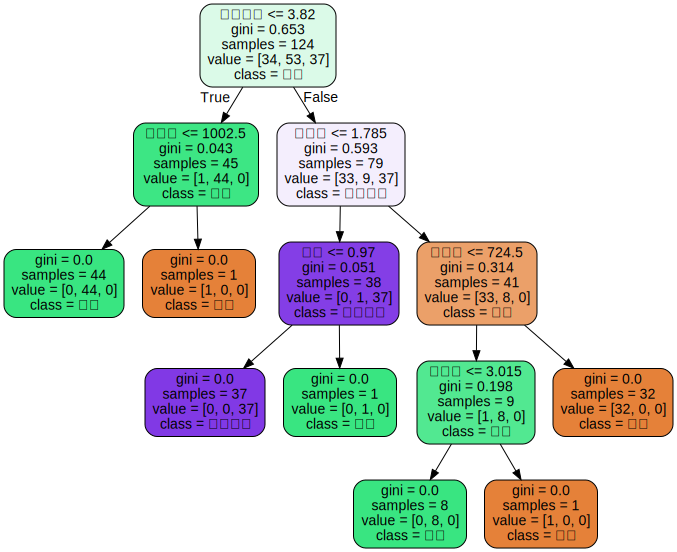

In [94]:
# 画一个树
import graphviz
import matplotlib.pyplot as plt 

feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青 素','颜色强度','色调','od280/od315 稀释葡萄酒','脯氨酸']

dot_data = tree.export_graphviz(clf,out_file = None ,feature_names = feature_name,
                               class_names = ["琴酒",'雪莉','贝尔摩德'],
                               filled = True , 
                               rounded = True )

graph  = graphviz.Source(dot_data)
graph 

In [92]:
# 探索决策树的属性
# 看每个特征的重要性  是为了哪些有用  把没用的删掉 做降维  
clf.feature_importances_
[*zip(feature_name,clf.feature_importances_)]  

[('酒精', 0.0),
 ('苹果酸', 0.02195224501537985),
 ('灰', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.3955768217709794),
 ('非黄烷类酚类', 0.0),
 ('花青 素', 0.0),
 ('颜色强度', 0.39720941385141617),
 ('色调', 0.024046373651715403),
 ('od280/od315 稀释葡萄酒', 0.0),
 ('脯氨酸', 0.16121514571050916)]

In [90]:
feature_name,clf.feature_importances_
# 和上边一对比就知道 *zip的用途了 实用 nice 

(['酒精',
  '苹果酸',
  '灰',
  '灰的碱性',
  '镁',
  '总酚',
  '类黄酮',
  '非黄烷类酚类',
  '花青 素',
  '颜色强度',
  '色调',
  'od280/od315 稀释葡萄酒',
  '脯氨酸'],
 array([0.        , 0.02195225, 0.        , 0.        , 0.        ,
        0.        , 0.39557682, 0.        , 0.        , 0.39720941,
        0.02404637, 0.        , 0.16121515]))

In [91]:
clf.apply(Xtrain) #  返回每个预测样本的叶子索引

array([ 2,  6,  2, 10,  6, 12,  2,  6, 10,  2,  6, 12,  2,  2,  6,  6,  2,
       12,  6,  2,  6, 12,  2,  2,  6,  6, 12,  2,  6,  6,  2, 12, 12, 12,
       12,  6,  2, 12,  2, 12,  3,  6,  2, 12, 12,  2,  2, 12,  2,  2,  2,
        6,  6,  2, 11,  7, 12,  2, 12,  2,  6,  6, 12, 12, 12, 12, 10,  2,
       12,  6,  2,  6,  6,  2,  2,  6, 10,  2,  2,  6,  2, 12,  2,  6,  2,
        2,  2,  6,  2,  2, 12,  6,  2, 12, 12,  2, 12, 12,  2, 10,  6,  2,
        6,  2,  6, 10, 12, 12,  2,  6,  6, 12,  6,  6, 10,  6, 12,  6,  2,
       12, 10,  6,  2,  6])

In [93]:
clf.tree_.node_count # 树的节点个数

13

In [95]:
clf.tree_.feature # 每个节点对应的属性索引值

array([ 9, 12, -2, -2,  6, 10, -2, -2, 12,  1, -2, -2, -2], dtype=int64)

In [97]:
score_train = clf.score(Xtrain,Ytrain)
score_train

1.0

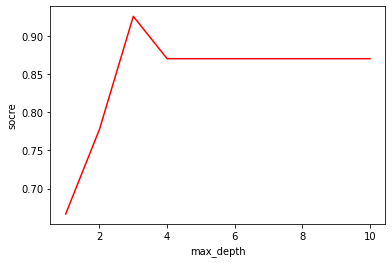

In [110]:
plt.rcParams['font.sans-serif'] = ['Simhel']
plt.rcParams['axes.unicode_minus'] = False 

# 剪枝操作 
test = [] 
for i in range(10) : 
    clf = tree.DecisionTreeClassifier(max_depth = i+1,
                                     criterion = 'entropy',
                                     random_state = 30,
                                     splitter = 'random')
    clf = clf.fit(Xtrain,Ytrain)
    score = clf.score(Xtest,Ytest)
    test.append(score)
    
plt.plot(range(1,11),test,color = 'red' , label = '学习曲线')

plt.ylabel('socre')

plt.xlabel('max_depth')

# plt.legend()
plt.show();

# 样本不平衡问题

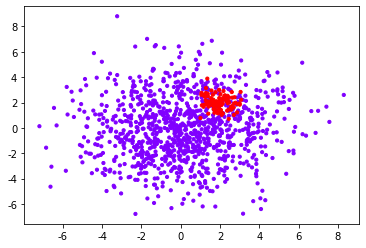

In [117]:
# 样本不平衡问题

import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.datasets import make_blobs # 聚类产生数据集的方法 

class_1  = 1000
class_2 = 100
centers =[[0,0],[2.0,2.0]]
clusters_std = [2.5,0.5]

X,y = make_blobs(n_samples = [class_1 , class_2 ],
          centers = centers,
          cluster_std = clusters_std,
          random_state = 420 , shuffle  =False )

plt.scatter(X[:,0],X[:,1],c=y,cmap = 'rainbow' ,s= 10 )


In [118]:
# 划分数据集

Xtrain ,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size = 0.2 , random_state = 420 )

# 不设定权重

clf_01 = DecisionTreeClassifier()
clf_01.fit(Xtrain,Ytrain)


DecisionTreeClassifier()

In [119]:
# 设定 权重  解决样本不平衡的问题 

clf_02  =  DecisionTreeClassifier(class_weight = 'balanced')
clf_02.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight='balanced')

In [121]:
clf_01.score(Xtest,Ytest)  , clf_02.score(Xtest,Ytest) # 发现带参数的好一些 

(0.9, 0.9045454545454545)

In [129]:
# 准确率
# 做样本均衡前
(Ytest[Ytest  == clf_01.predict(Xtest)] == 1).sum()/(Ytest == 1).sum()

0.4827586206896552

In [130]:
# 做样本均衡后
(Ytest[Ytest  == clf_02.predict(Xtest)] == 1).sum()/(Ytest == 1).sum()

0.5862068965517241

In [126]:
(Ytest[Ytest == clf.predict(Xtest)] == 1).sum()/(Ytest == 1).sum()

ValueError: X has 2 features, but DecisionTreeClassifier is expecting 13 features as input.

In [127]:
Precision_1 = (Ytest[Ytest == clf_01.predict(Xtest)] == 1).sum()/(clf_01.predict(Xtest) == 1).sum()
Precision_1

0.6666666666666666

In [128]:
Precision_2 = (Ytest[Ytest == clf_02.predict(Xtest)] == 1).sum()/(clf_02.predict(Xtest) == 1).sum() 
Precision_2

0.6538461538461539

In [132]:
from sklearn import metrics 

#平衡前

metrics.confusion_matrix(Ytest,clf_01.predict(Xtest))

array([[184,   7],
       [ 15,  14]])

In [133]:
#平衡后

metrics.confusion_matrix(Ytest,clf_02.predict(Xtest))

array([[182,   9],
       [ 12,  17]])

In [135]:
# Precision 精准率
metrics.precision_score(Ytest,clf_01.predict(Xtest)) 


0.6666666666666666

In [136]:
metrics.precision_score(Ytest,clf_02.predict(Xtest))

0.6538461538461539

In [137]:
# Recall
metrics.recall_score(Ytest,clf_01.predict(Xtest))

0.4827586206896552

In [138]:
metrics.recall_score(Ytest,clf_02.predict(Xtest))

0.5862068965517241

In [139]:
# F-measure
metrics.f1_score(Ytest,clf_01.predict(Xtest))

0.56

In [140]:
metrics.f1_score(Ytest,clf_02.predict(Xtest))
#为了同时兼顾精确度和召回率，我们创造了两者的调和平均数作为考量两者平衡的综合性指标，称之为 F1 measure。

0.6181818181818182